In [1]:
import yahoo_fin.stock_info as si
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

In [2]:
sp500_list = si.tickers_sp500()

In [3]:
sp500_historical = {}
for ticker in sp500_list:
    sp500_historical[ticker] = si.get_data(ticker, start_date="01/01/2018", index_as_date = False, interval="1d") 

In [4]:
for ticker in sp500_list:
    sp500_historical[ticker]['pct_change_close'] = sp500_historical[ticker]['adjclose'].pct_change()
    sp500_historical[ticker]['five_day_mean'] = sp500_historical[ticker]['pct_change_close'].rolling(5).mean()
    sp500_historical[ticker]['five_day_var'] = sp500_historical[ticker]['pct_change_close'].rolling(5).var()
    sp500_historical[ticker]['twenty_day_mean'] = sp500_historical[ticker]['pct_change_close'].rolling(20).mean()
    sp500_historical[ticker]['twenty_day_var'] = sp500_historical[ticker]['pct_change_close'].rolling(20).var()


In [5]:
sp500_historical['GOOG']

,date,open,high,low,close,adjclose,volume,ticker,pct_change_close,five_day_mean,five_day_var,twenty_day_mean,twenty_day_var
0,2018-01-02,52.417000,53.347000,52.261501,53.250000,53.250000,24752000,GOOG,NaN,NaN,NaN,NaN,NaN
1,2018-01-03,53.215500,54.314499,53.160500,54.124001,54.124001,28604000,GOOG,0.016413,NaN,NaN,NaN,NaN
2,2018-01-04,54.400002,54.678501,54.200100,54.320000,54.320000,20092000,GOOG,0.003621,NaN,NaN,NaN,NaN
3,2018-01-05,54.700001,55.212502,54.599998,55.111500,55.111500,25582000,GOOG,0.014571,NaN,NaN,NaN,NaN
4,2018-01-08,55.111500,55.563499,55.081001,55.347000,55.347000,20952000,GOOG,0.004273,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1240,2022-12-05,99.815002,101.750000,99.355003,99.870003,99.870003,19955500,GOOG,-0.009521,0.007783,0.000962,0.007405,0.000671
1241,2022-12-06,99.669998,100.209999,96.760002,97.309998,97.309998,20877600,GOOG,-0.025633,0.004340,0.001160,0.004999,0.000710
1242,2022-12-07,96.769997,97.309998,95.025002,95.150002,95.150002,26647900,GOOG,-0.022197,-0.012694,0.000114,0.003742,0.000747
1243,2022-12-08,95.690002,95.870003,93.800003,93.949997,93.949997,25593200,GOOG,-0.012612,-0.014881,0.000078,0.003961,0.000739


In [6]:
sp_df = None
for ticker in sp500_list:
    if sp_df is not None:
        sp_df = pd.concat([sp_df, sp500_historical[ticker]])
    else:
        sp_df = sp500_historical[ticker]

sp_df.sort_index(inplace=True)
sp_df

,date,open,high,low,close,adjclose,volume,ticker,pct_change_close,five_day_mean,five_day_var,twenty_day_mean,twenty_day_var
0,2018-01-02,67.419998,67.889999,67.339996,67.599998,65.192207,1047800,A,NaN,NaN,NaN,NaN,NaN
0,2018-12-07,22.000000,22.750000,18.510000,18.600000,18.600000,12995600,MRNA,NaN,NaN,NaN,NaN,NaN
0,2018-01-02,53.998093,54.150764,53.482822,53.645039,46.217430,10556504,MRK,NaN,NaN,NaN,NaN,NaN
0,2018-01-02,113.000000,116.349998,112.660004,116.309998,111.711136,285800,MPWR,NaN,NaN,NaN,NaN,NaN
0,2018-01-02,66.110001,67.250000,65.980003,67.180000,55.811996,3055900,MPC,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,2022-12-09,221.809998,222.610001,219.440002,219.759995,219.759995,916900,ITW,-0.007049,-0.007557,0.000074,-0.000971,0.000084
1244,2022-12-09,117.160004,118.040001,116.040001,116.519997,116.519997,364000,GL,-0.009268,-0.007712,0.000085,0.001247,0.000181
1244,2022-12-09,529.109985,532.080017,524.000000,524.919983,524.919983,873100,ELV,-0.007938,0.000525,0.000053,0.000602,0.000395
1244,2022-12-09,88.900002,90.300003,88.629997,89.089996,89.089996,67316900,AMZN,-0.013946,-0.010735,0.000525,-0.003834,0.000467


In [7]:
sample_df = sp_df[sp_df['date'] == '2021-08-13']
sample_df

,date,open,high,low,close,adjclose,volume,ticker,pct_change_close,five_day_mean,five_day_var,twenty_day_mean,twenty_day_var
63,2021-08-13,33.500000,34.490002,32.860001,34.209999,32.419765,3441500,OGN,0.021194,0.031206,0.003007,0.009034,0.001127
354,2021-08-13,90.260002,91.029999,90.099998,90.660004,88.878403,2823900,OTIS,0.005100,0.001160,0.000022,0.003312,0.000078
354,2021-08-13,55.939999,56.250000,55.740002,56.150002,55.191662,2316300,CARR,0.003037,-0.000783,0.000084,0.006920,0.000362
560,2021-08-13,46.139999,46.330002,45.900002,45.990002,45.396511,2872700,CTVA,-0.001520,0.006064,0.000028,0.005133,0.000443
606,2021-08-13,63.970001,64.099998,63.349998,63.689999,59.232819,2385600,DOW,-0.004999,0.005458,0.000164,0.003108,0.000268
...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,2021-08-13,122.815002,123.849998,121.750000,122.852501,122.852501,1347200,DXCM,-0.002922,-0.009853,0.000273,0.005092,0.001190
910,2021-08-13,43.259998,43.529999,42.860001,43.450001,43.450001,6034400,ON,0.001152,-0.008092,0.000308,0.011173,0.001134
910,2021-08-13,219.880005,220.550003,217.729996,218.570007,212.377533,2049400,CAT,-0.007583,0.009771,0.000375,0.002880,0.000250
910,2021-08-13,89.620003,89.629997,88.480003,88.680000,87.245346,1542400,BALL,-0.008608,0.008015,0.000179,0.001850,0.000359


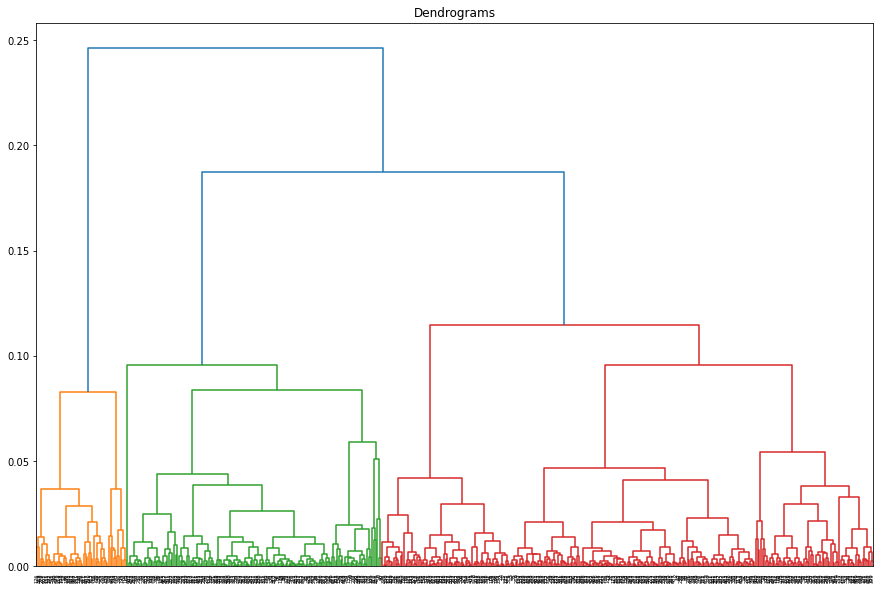

In [8]:
plt.figure(figsize=(15, 10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(
    sample_df[[
        'pct_change_close', 
        'five_day_mean', 
        'five_day_var', 
        'twenty_day_mean', 
        'twenty_day_var'
    ]], method='ward'))

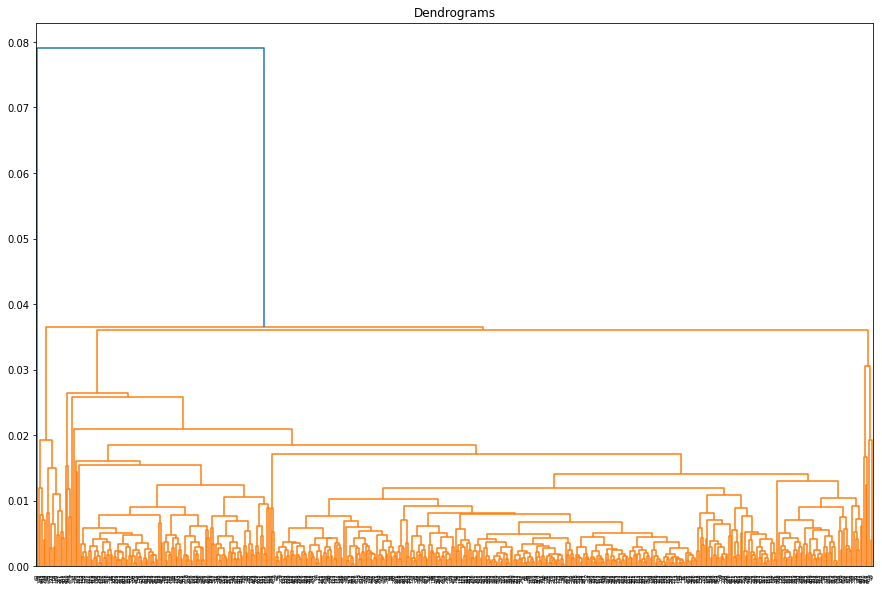

In [9]:
plt.figure(figsize=(15, 10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(
    sample_df[[
        'pct_change_close', 
        'five_day_mean', 
        'five_day_var', 
        'twenty_day_mean', 
        'twenty_day_var'
    ]], method='average'
    ))

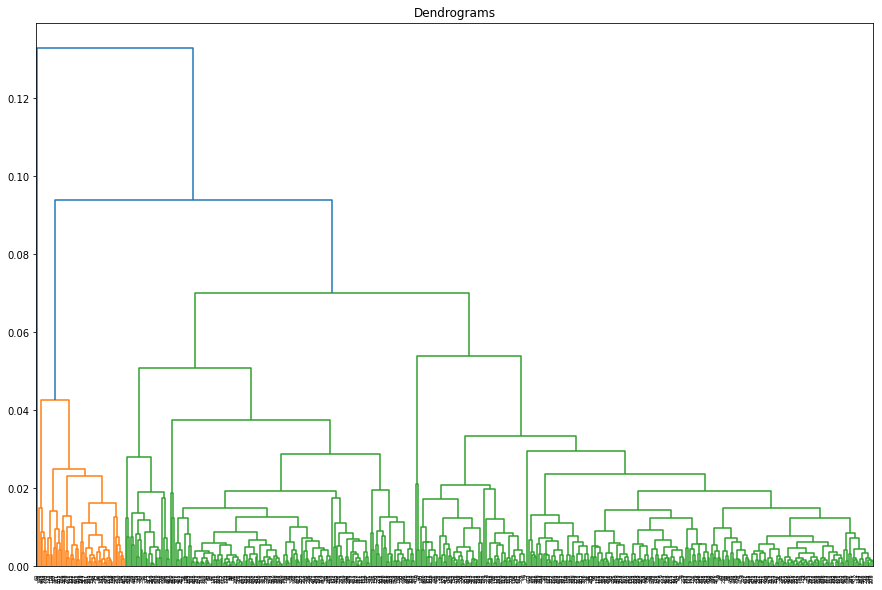

In [10]:
plt.figure(figsize=(15, 10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(
    sample_df[[
        'pct_change_close', 
        'five_day_mean', 
        'five_day_var', 
        'twenty_day_mean', 
        'twenty_day_var'
    ]],method='complete'
    ))

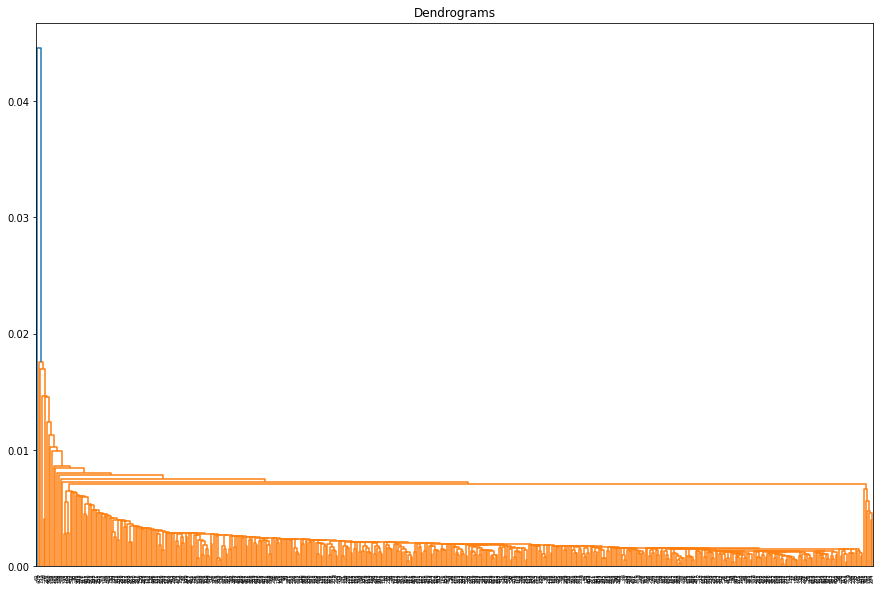

In [11]:
plt.figure(figsize=(15, 10))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(
    sample_df[[
        'pct_change_close', 
        'five_day_mean', 
        'five_day_var', 
        'twenty_day_mean', 
        'twenty_day_var'
    ]], method='single'
    ))

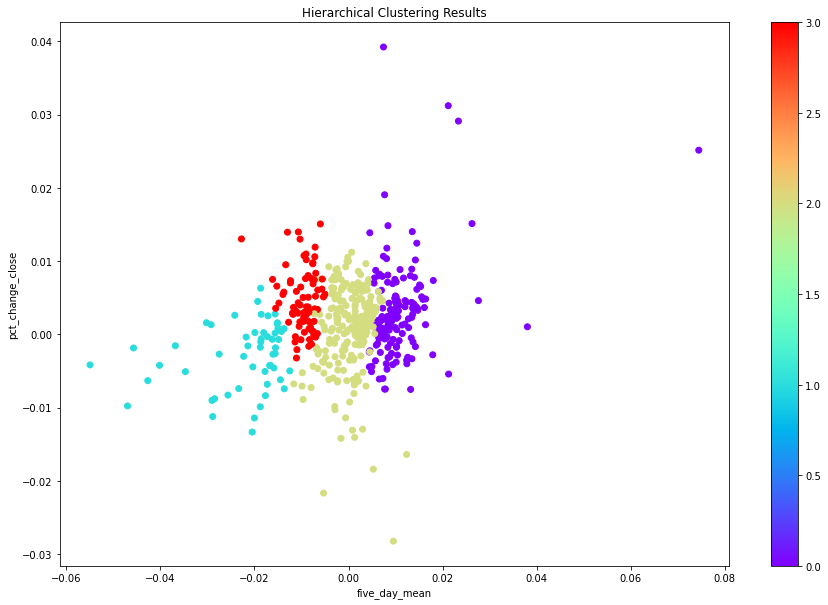

In [12]:
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
labels = hc.fit_predict(sample_df[['pct_change_close', 'five_day_mean', 'five_day_var', 'twenty_day_mean', 'twenty_day_var']])

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
scatter = ax.scatter(sample_df['pct_change_close'], sample_df['five_day_mean'], c=labels, cmap='rainbow')
ax.set_title('Hierarchical Clustering Results')
ax.set_ylabel('pct_change_close')
ax.set_xlabel('five_day_mean')
plt.colorbar(scatter)
plt.show()

In [13]:
sample_df['cluster'] = labels
sample_df

<ipython-input-13-ffdc378b6cae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df['cluster'] = labels


,date,open,high,low,close,adjclose,volume,ticker,pct_change_close,five_day_mean,five_day_var,twenty_day_mean,twenty_day_var,cluster
63,2021-08-13,33.500000,34.490002,32.860001,34.209999,32.419765,3441500,OGN,0.021194,0.031206,0.003007,0.009034,0.001127,0
354,2021-08-13,90.260002,91.029999,90.099998,90.660004,88.878403,2823900,OTIS,0.005100,0.001160,0.000022,0.003312,0.000078,2
354,2021-08-13,55.939999,56.250000,55.740002,56.150002,55.191662,2316300,CARR,0.003037,-0.000783,0.000084,0.006920,0.000362,2
560,2021-08-13,46.139999,46.330002,45.900002,45.990002,45.396511,2872700,CTVA,-0.001520,0.006064,0.000028,0.005133,0.000443,2
606,2021-08-13,63.970001,64.099998,63.349998,63.689999,59.232819,2385600,DOW,-0.004999,0.005458,0.000164,0.003108,0.000268,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,2021-08-13,122.815002,123.849998,121.750000,122.852501,122.852501,1347200,DXCM,-0.002922,-0.009853,0.000273,0.005092,0.001190,2
910,2021-08-13,43.259998,43.529999,42.860001,43.450001,43.450001,6034400,ON,0.001152,-0.008092,0.000308,0.011173,0.001134,2
910,2021-08-13,219.880005,220.550003,217.729996,218.570007,212.377533,2049400,CAT,-0.007583,0.009771,0.000375,0.002880,0.000250,3
910,2021-08-13,89.620003,89.629997,88.480003,88.680000,87.245346,1542400,BALL,-0.008608,0.008015,0.000179,0.001850,0.000359,3


In [14]:
trend_down = sample_df[sample_df['cluster'] == 2]
trend_up = sample_df[sample_df['cluster'] == 1]
mean_revert_down = sample_df[sample_df['cluster'] == 0]
mean_revert_up =sample_df[sample_df['cluster'] == 3]

In [15]:
print(len(trend_down))
print(len(trend_up))
print(len(mean_revert_down))
print(len(mean_revert_up))

218
54
153
77


In [16]:
td_clust = {
    'pct_change_close': trend_down['pct_change_close'].mean(),
    'five_day_mean': trend_down['five_day_mean'].mean(),
    'five_day_var': trend_down['five_day_var'].mean(),
    'twenty_day_mean': trend_down['twenty_day_mean'].mean(),
    'twenty_day_var': trend_down['twenty_day_var'].mean() 
}

tu_clust = {
    'pct_change_close': trend_up['pct_change_close'].mean(),
    'five_day_mean': trend_up['five_day_mean'].mean(),
    'five_day_var': trend_up['five_day_var'].mean(),
    'twenty_day_mean': trend_up['twenty_day_mean'].mean(),
    'twenty_day_var': trend_up['twenty_day_var'].mean()
}

mrd_clust = {
    'pct_change_close': mean_revert_down['pct_change_close'].mean(),
    'five_day_mean': mean_revert_down['five_day_mean'].mean(),
    'five_day_var': mean_revert_down['five_day_var'].mean(),
    'twenty_day_mean': mean_revert_down['twenty_day_mean'].mean(),
    'twenty_day_var': mean_revert_down['twenty_day_var'].mean() 
}

mru_clust = {
    'pct_change_close': mean_revert_up['pct_change_close'].mean(),
    'five_day_mean': mean_revert_up['five_day_mean'].mean(),
    'five_day_var': mean_revert_up['five_day_var'].mean(),
    'twenty_day_mean': mean_revert_up['twenty_day_mean'].mean(),
    'twenty_day_var': mean_revert_up['twenty_day_var'].mean() 
}

In [17]:
tu_clust

{'pct_change_close': -0.022298701506426558,
 'five_day_mean': -0.002942809054214612,
 'five_day_var': 0.00038492836807744237,
 'twenty_day_mean': 0.001018374755197556,
 'twenty_day_var': 0.0006770028074430307}

In [18]:
td_clust

{'pct_change_close': 0.00030933855008617896,
 'five_day_mean': 0.0007071752508351347,
 'five_day_var': 0.00018096189065003627,
 'twenty_day_mean': 0.0021469084727367507,
 'twenty_day_var': 0.00027993101500248696}

In [19]:
mru_clust

{'pct_change_close': -0.009624707751883265,
 'five_day_mean': 0.004688903957606921,
 'five_day_var': 0.00023868672663003915,
 'twenty_day_mean': 0.0028524443289152093,
 'twenty_day_var': 0.00036810747756278847}

In [20]:
mrd_clust

{'pct_change_close': 0.01080826810694878,
 'five_day_mean': 0.00318104104053203,
 'five_day_var': 0.00016541582723517755,
 'twenty_day_mean': 0.0018458574054899634,
 'twenty_day_var': 0.00021359898350393092}

In [21]:
def centroid_dist(row, clust):
    dist = 0
    for name in clust:
        dist += (row[name] - clust[name])**2
    
    return dist

In [22]:
trend_down['centroid_dist'] = trend_down.apply(centroid_dist, clust=td_clust, axis=1)
trend_up['centroid_dist'] = trend_up.apply(centroid_dist, clust=tu_clust, axis=1)
mean_revert_down['centroid_dist'] = mean_revert_down.apply(centroid_dist, clust=mrd_clust, axis=1)
mean_revert_up['centroid_dist'] = mean_revert_up.apply(centroid_dist, clust=mru_clust, axis=1)

<ipython-input-22-6ff63dd24500>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trend_down['centroid_dist'] = trend_down.apply(centroid_dist, clust=td_clust, axis=1)
<ipython-input-22-6ff63dd24500>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trend_up['centroid_dist'] = trend_up.apply(centroid_dist, clust=tu_clust, axis=1)
<ipython-input-22-6ff63dd24500>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [23]:
td_short = trend_down.sort_values('centroid_dist', ascending=True).head(3)['ticker']
tu_long = trend_up.sort_values('centroid_dist', ascending=True).head(3)['ticker']
mr_short = mean_revert_down.sort_values('centroid_dist', ascending=True).head(3)['ticker']
mr_long = mean_revert_up.sort_values('centroid_dist', ascending=True).head(3)['ticker']

In [24]:
print(f'Short {list(td_short)} for trend')
print(f'Long {list(tu_long)} for trend')
print(f'Short {list(mr_short)} for mean reverting')
print(f'Long {list(mr_long)} for mean reverting')

Short ['IBM', 'GOOG', 'FAST'] for trend
Long ['F', 'COP', 'GNRC'] for trend
Short ['MSFT', 'MSI', 'EVRG'] for mean reverting
Long ['IRM', 'FITB', 'TRGP'] for mean reverting
